In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Admin'

In [9]:
os.chdir('C:\Users\Admin\OneDrive\Desktop\diabetes')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (977424052.py, line 1)

In [8]:
os.getcwd()

'C:\\Users\\Admin'

In [10]:
import numpy as np

In [11]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [19]:
dataset=pd.read_csv('diabetes_data_upload (1).csv')

In [20]:
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


<AxesSubplot:>

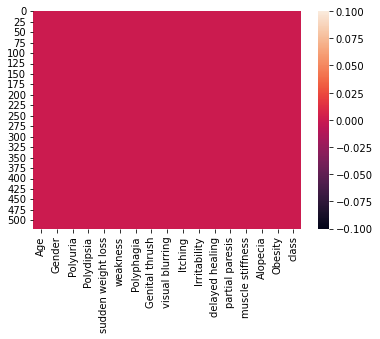

In [13]:
sns.heatmap(dataset.isnull())

In [21]:
dataset['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [15]:
dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0})
dataset['class'] = dataset['class'].map({'Positive':1,'Negative':0})
dataset['Polyuria'] = dataset['Polyuria'].map({'Yes':1,'No':0})
dataset['Polydipsia'] = dataset['Polydipsia'].map({'Yes':1,'No':0})
dataset['sudden weight loss'] = dataset['sudden weight loss'].map({'Yes':1,'No':0})
dataset['weakness'] = dataset['weakness'].map({'Yes':1,'No':0})
dataset['Polyphagia'] = dataset['Polyphagia'].map({'Yes':1,'No':0})
dataset['Genital thrush'] = dataset['Genital thrush'].map({'Yes':1,'No':0})
dataset['visual blurring'] = dataset['visual blurring'].map({'Yes':1,'No':0})
dataset['Itching'] = dataset['Itching'].map({'Yes':1,'No':0})
dataset['Irritability'] = dataset['Irritability'].map({'Yes':1,'No':0})
dataset['delayed healing'] = dataset['delayed healing'].map({'Yes':1,'No':0})
dataset['partial paresis'] = dataset['partial paresis'].map({'Yes':1,'No':0})
dataset['muscle stiffness'] = dataset['muscle stiffness'].map({'Yes':1,'No':0})
dataset['Alopecia'] = dataset['Alopecia'].map({'Yes':1,'No':0})
dataset['Obesity'] = dataset['Obesity'].map({'Yes':1,'No':0})


In [16]:
#Analysing the correlation between independent and dependent variables

In [17]:
corrdata = dataset.corr()

<AxesSubplot:>

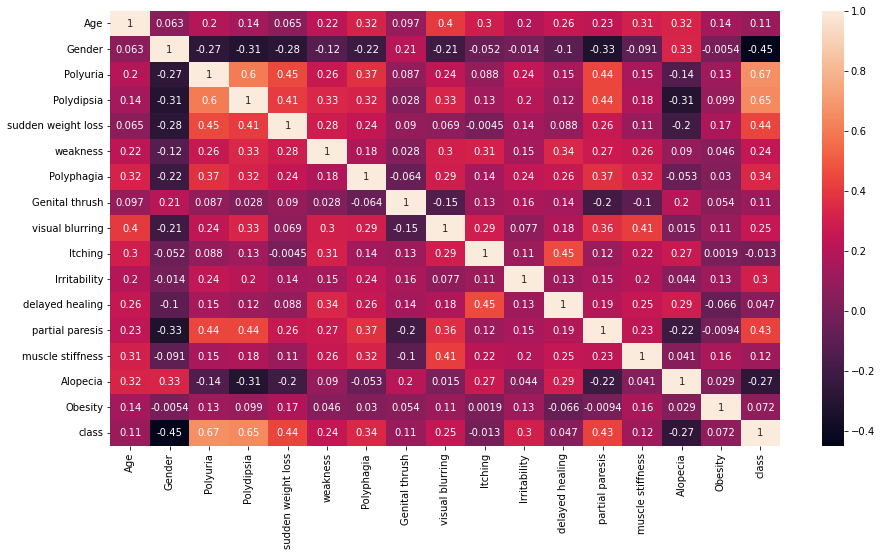

In [18]:
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

In [19]:
#Age distribution

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

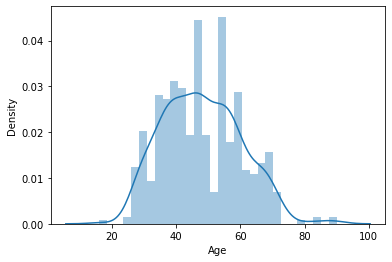

In [20]:
sns.distplot(dataset['Age'],bins=30)

<AxesSubplot:xlabel='class', ylabel='Age'>

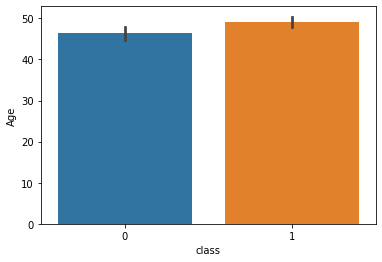

In [21]:
sns.barplot(x='class',y='Age',data=dataset)

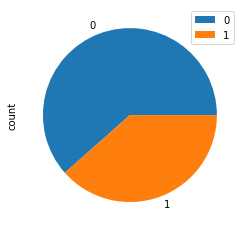

In [22]:
ds = dataset['class'].value_counts().reset_index()
ds.columns = ['class', 'count']
plot=ds.plot.pie(y='count')

<AxesSubplot:xlabel='class', ylabel='count'>

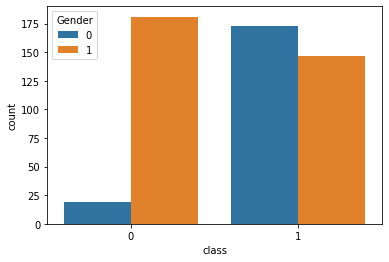

In [23]:
sns.countplot(x='class',data=dataset,hue='Gender')

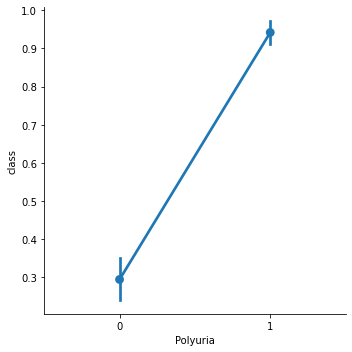

In [24]:
sns.catplot(x="Polyuria", y="class", kind="point", data=dataset)

<AxesSubplot:xlabel='Polydipsia', ylabel='class'>

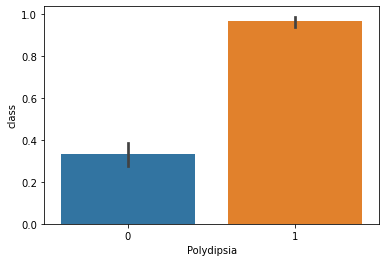

In [25]:
sns.barplot(x='Polydipsia',y='class',data=dataset)

<AxesSubplot:xlabel='class', ylabel='count'>

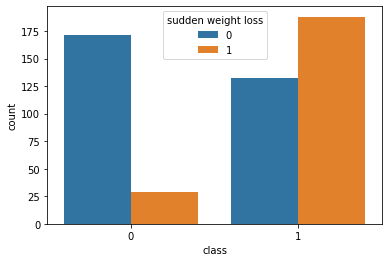

In [26]:
sns.countplot(x='class',data=dataset,hue='sudden weight loss')

<AxesSubplot:xlabel='class', ylabel='count'>

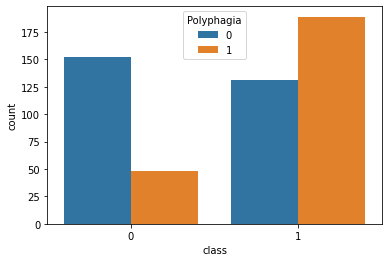

In [27]:
sns.countplot(x='class',data=dataset, hue='Polyphagia')

<AxesSubplot:xlabel='Polyphagia', ylabel='class'>

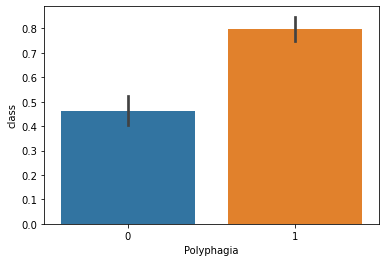

In [28]:
sns.barplot(x='Polyphagia',y='class',data=dataset)

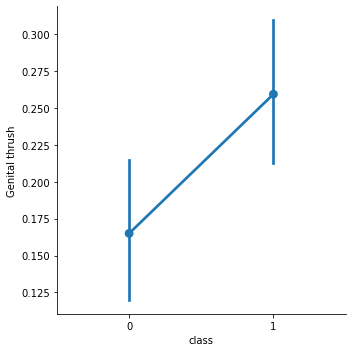

In [29]:
sns.catplot(x='class',y='Genital thrush',kind='point',data=dataset)

<AxesSubplot:xlabel='class', ylabel='partial paresis'>

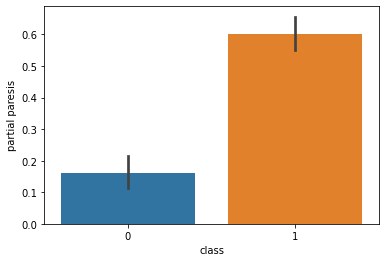

In [30]:
sns.barplot(x='class',y='partial paresis',data=dataset)

<AxesSubplot:xlabel='Alopecia', ylabel='class'>

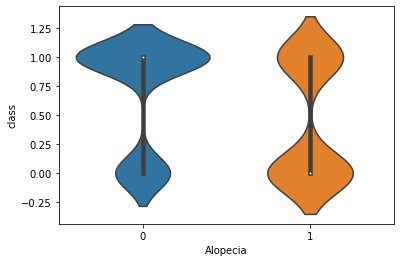

In [31]:
sns.violinplot(x='Alopecia',y='class',data=dataset)

<AxesSubplot:xlabel='visual blurring', ylabel='class'>

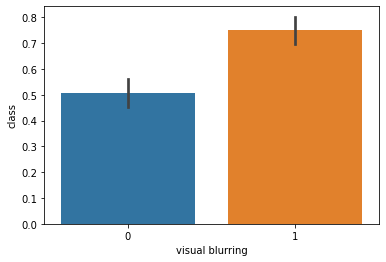

In [32]:
sns.barplot(x="visual blurring", y="class", data=dataset)

<AxesSubplot:xlabel='Itching', ylabel='class'>

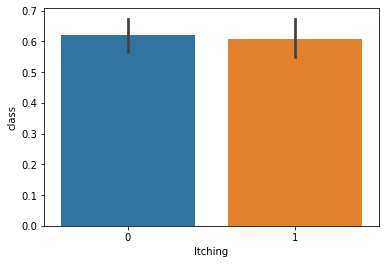

In [33]:
sns.barplot(x="Itching", y="class", data=dataset)

<AxesSubplot:xlabel='Obesity', ylabel='class'>

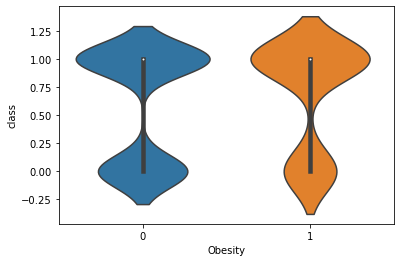

In [34]:
sns.violinplot(x='Obesity',y='class',data=dataset)

<AxesSubplot:xlabel='Irritability', ylabel='class'>

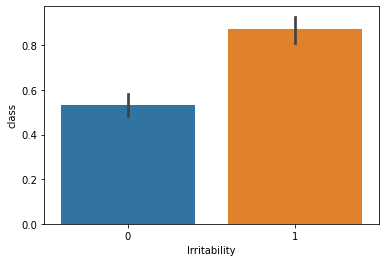

In [35]:
sns.barplot(x='Irritability',y='class',data=dataset)

In [37]:
X1 = dataset.iloc[:,0:-1]
y1 = dataset.iloc[:,-1]

In [38]:
X1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [39]:
#Feature selection using selectkbest

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,y1)

In [41]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)

In [42]:
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

In [43]:
featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


In [44]:
print(featurescores.nlargest(10,'scores'))

                column      scores
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


<AxesSubplot:>

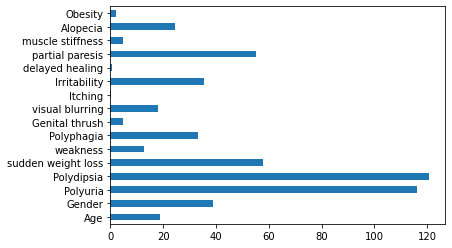

In [45]:
featureview=pd.Series(fit.scores_, index=X1.columns)
featureview.plot(kind='barh')

In [46]:
#Checking the variance of each feature, Features must have high variance with other features

In [47]:
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X1)

In [48]:
dataset_scores1 = pd.DataFrame(falls.variances_)
dat1 = pd.DataFrame(X1.columns)

In [49]:
igh_variance = pd.concat([dataset_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']

NameError: name 'high_variance' is not defined

In [50]:
high_variance = pd.concat([dataset_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']

In [51]:
high_variance[high_variance['variance']>0.2]

,variance,cols
0,147.374168,Age
1,0.232899,Gender
2,0.249985,Polyuria
3,0.247304,Polydipsia
4,0.243162,sudden weight loss
5,0.242511,weakness
6,0.248044,Polyphagia
8,0.247304,visual blurring
9,0.249819,Itching
11,0.248369,delayed healing


In [52]:
X = dataset[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = dataset['class']

In [53]:
#Splitting the dataset into training and testing sets

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [55]:
#Standardization of independant variables

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [57]:
#Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [59]:
#Cross validation test for training data

In [60]:
rom sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

SyntaxError: invalid syntax (3767770074.py, line 1)

In [61]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 84.85 %
std is 4.95 %


In [62]:
pre=lg.predict(X_test)

In [63]:
#Take a look into Accuracy and Confusion matrix


In [64]:
logistic_regression=accuracy_score(pre,y_test)
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))

0.8942307692307693
[[34  5]
 [ 6 59]]


In [65]:
#Classification Report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.91      0.91        65

    accuracy                           0.89       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.89      0.89      0.89       104



In [67]:
#svm

In [68]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 83.18 %
std is 4.94 %


In [70]:
pre1=sv.predict(X_test)

In [71]:
svm_linear=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))

0.9038461538461539
[[34  4]
 [ 6 60]]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        38
           1       0.94      0.91      0.92        66

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.90       104
weighted avg       0.91      0.90      0.90       104



In [73]:
from sklearn.svm import SVC
svrf=SVC(kernel='rbf',random_state=0)
svrf.fit(X_train,y_train)

SVC(random_state=0)

In [74]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svrf, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 88.47 %
std is 3.69 %


In [75]:
pre2=svrf.predict(X_test)

In [76]:
svm_rbf=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))
print(confusion_matrix(pre2,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [77]:
from sklearn.metrics import classification_report
print(classification_report(pre2,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [78]:
from sklearn.neighbors import KNeighborsClassifier
score=[]

In [79]:
for i in range(1,10):
    
    
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pre3=knn.predict(X_test)
    ans=accuracy_score(pre3,y_test)
    score.append(round(100*ans,2))
print(sorted(score,reverse=True)[:5])
knn=sorted(score,reverse=True)[:1]

[98.08, 98.08, 98.08, 98.08, 97.12]


In [80]:
#NBB

In [81]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [82]:
rom sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

SyntaxError: invalid syntax (86672573.py, line 1)

In [83]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 82.94 %
std is 8.03 %


In [84]:
pre4=gb.predict(X_test)

In [85]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
print(accuracy_score(pre4,y_test))
print(confusion_matrix(pre4,y_test))

0.8557692307692307
[[32  7]
 [ 8 57]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(pre4,y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.89      0.88      0.88        65

    accuracy                           0.86       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.86      0.86      0.86       104



In [87]:
#Decision tree 

In [88]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 91.60 %
std is 3.43 %


In [90]:
pre5=dc.predict(X_test)

In [91]:
Decisiontress_classifier=accuracy_score(pre5,y_test)
print(accuracy_score(pre5,y_test))
print(confusion_matrix(pre5,y_test))

0.9711538461538461
[[39  2]
 [ 1 62]]


In [92]:
from sklearn.metrics import classification_report
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.98      0.98        63

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [93]:
#Random forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)

In [95]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 89.90 %
std is 5.60 %


In [96]:
pre6 = rc.predict(X_test)

In [97]:
Random_forest=accuracy_score(pre6,y_test)
print(accuracy_score(pre6,y_test))
print(confusion_matrix(pre6,y_test)

SyntaxError: unexpected EOF while parsing (1133202032.py, line 3)

In [98]:
Random_forest=accuracy_score(pre6,y_test)
print(accuracy_score(pre6,y_test))
print(confusion_matrix(pre6,y_test))

0.9807692307692307
[[39  1]
 [ 1 63]]


In [99]:
#Accuracies of all classification model overview

In [100]:
print('Logistic regression:',logistic_regression)
print('svmlinear:',svm_linear)
print('svmrbf:',svm_rbf)
print('knn:',knn)
print('naive bayes:',Naive_bayes_Gaussian_nb)
print('Decision tress:',Decisiontress_classifier)
print('Random forest:',Random_forest)

Logistic regression: 0.8942307692307693
svmlinear: 0.9038461538461539
svmrbf: 0.9807692307692307
knn: [98.08]
naive bayes: 0.8557692307692307
Decision tress: 0.9711538461538461
Random forest: 0.9807692307692307
